<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      16598 non-null  float64
 1   EU_Sales      16598 non-null  float64
 2   JP_Sales      16598 non-null  float64
 3   Other_Sales   16598 non-null  float64
 4   Global_Sales  16598 non-null  float64
dtypes: float64(5)
memory usage: 648.5 KB
None


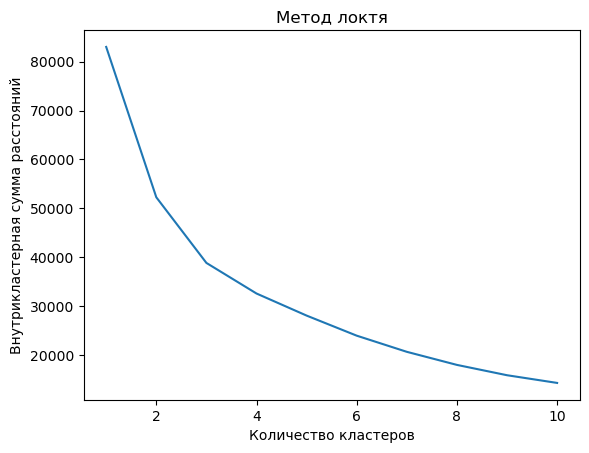

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Количество вхождений
0,0.24,0.25,0.00,0.11,0.60,3978
1,0.00,0.00,0.03,0.00,0.03,10263
2,0.05,0.03,0.12,0.01,0.22,2357


AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv("vgsales.csv")

data = data.drop(["Rank", "Name", "Platform", "Year", "Publisher", "Genre"], axis=1)

print(data.info())

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title("Метод локтя")
plt.xlabel("Количество кластеров")
plt.ylabel("Внутрикластерная сумма расстояний")
plt.show()

def random_centroids(data, centroid_count):
    return data.sample(n=centroid_count)

def get_labels(data, centroids):
    return data.apply(lambda x: np.argmin(np.linalg.norm(x - centroids, axis=1)), axis=1)

def new_centroids(data, labels, centroid_count):
    return data.groupby(labels).mean()

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], color='hotpink', marker='*', s=200)
    plt.show()

max_iterations = 100
centroid_count = 3

centroids = random_centroids(data_scaled, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data_scaled, centroids)
    centroids = new_centroids(data_scaled, labels, centroid_count)
    plot_clusters(data_scaled, labels, centroids, iteration)
    iteration += 1

centroids

labels.value_counts()

kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)
print("Центроиды кластеров:", kmeans.cluster_centers_)

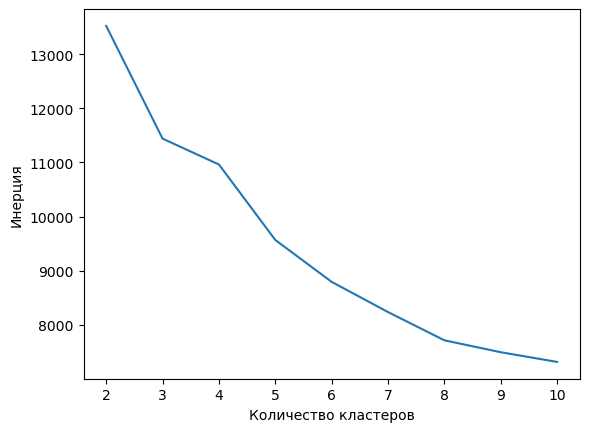

Центроиды кластеров: [[-0.11055823 -0.1189733  -0.08291506 -0.10479463 -0.12587217]
 [ 2.2590861   2.55749485  1.65692207  2.22015341  2.61512829]
 [13.62457171 12.5675705  10.83593478 11.60884035 14.79766364]]
Количество вхождений в кластеры: [15694   563    34]


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Количество вхождений
0,0.174723,0.087140,0.052974,0.028507,0.343631,15694
1,2.123535,1.450231,0.595577,0.470426,4.639591,563
2,11.470588,6.548235,3.458235,2.255000,23.733235,34


In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

def k_means(X, n_clusters, max_iterations=100):
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]
    for _ in range(max_iterations):
        distances = np.array([euclidean_distance(X, centroid) for centroid in centroids]).T
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i] for i in range(n_clusters)])
        if np.linalg.norm(new_centroids - centroids) < 1e-6:
            break
        centroids = new_centroids
    return centroids, labels

data = pd.read_csv('vgsales.csv')
data = data.dropna()
data = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

n_clusters_range = range(2, 11)
inertias = []

for n_clusters in n_clusters_range:
    centroids, labels = k_means(data_scaled, n_clusters)
    inertia = np.sum([np.sum(euclidean_distance(data_scaled[labels == i], centroids[i])) for i in range(n_clusters)])
    inertias.append(inertia)

plt.plot(n_clusters_range, inertias)
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.show()

n_clusters = 3
centroids, labels = k_means(data_scaled, n_clusters)
print("Центроиды кластеров:", centroids)
print("Количество вхождений в кластеры:", np.bincount(labels))

centroids_original = scaler.inverse_transform(centroids)
centroids_original_df = pd.DataFrame(centroids_original, columns=data.columns)
centroids_original_df['Количество вхождений'] = np.bincount(labels)
display(centroids_original_df)

def random_centroids(data, centroid_count):
    return data.sample(n=centroid_count)

def get_labels(data, centroids):
    return data.apply(lambda x: np.argmin(np.linalg.norm(x - centroids, axis=1)), axis=1)

def new_centroids(data, labels, centroid_count):
    return data.groupby(labels).mean()

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], color='hotpink', marker='*', s=200)
    plt.show()


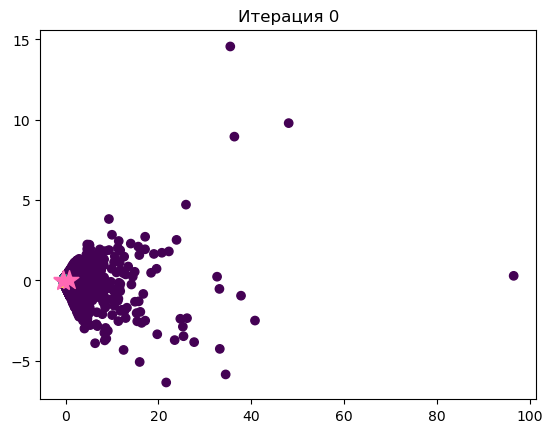

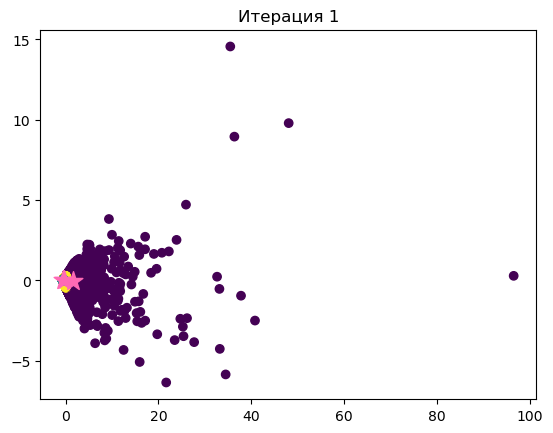

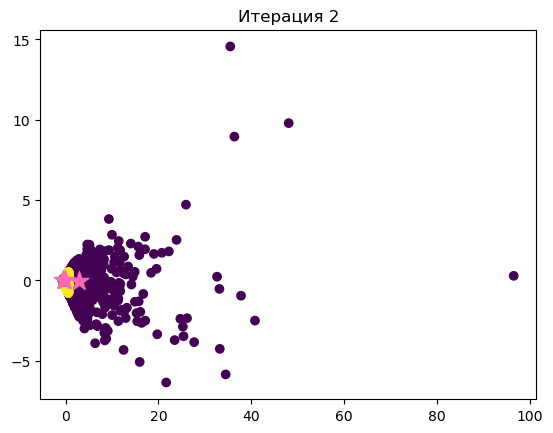

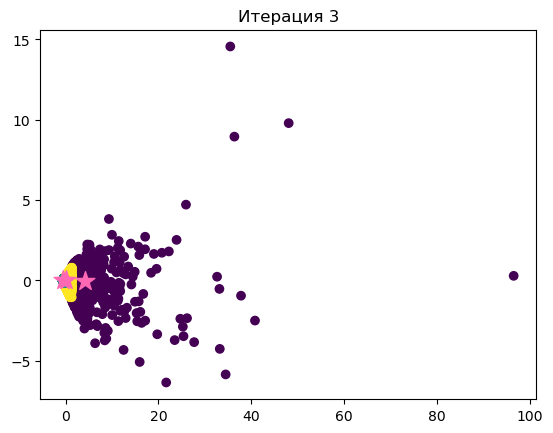

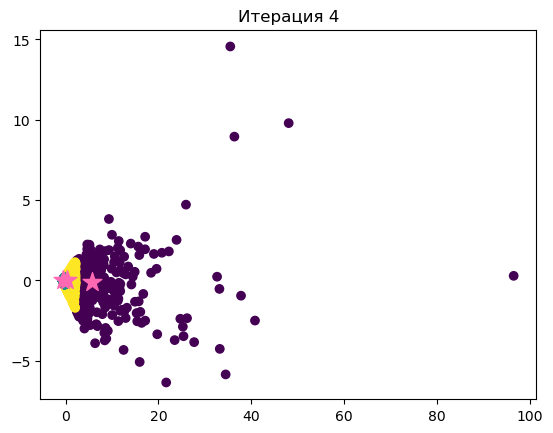

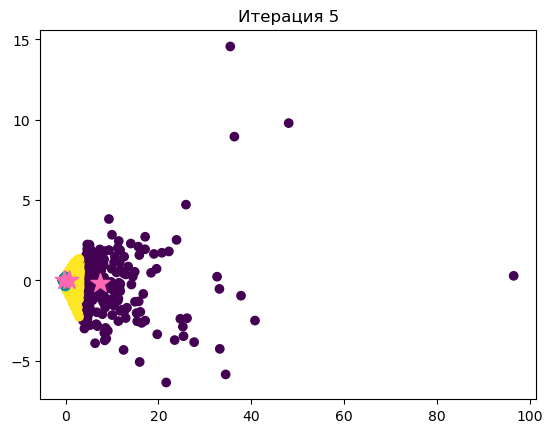

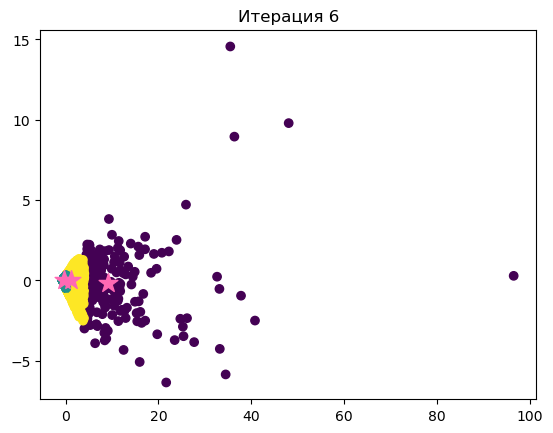

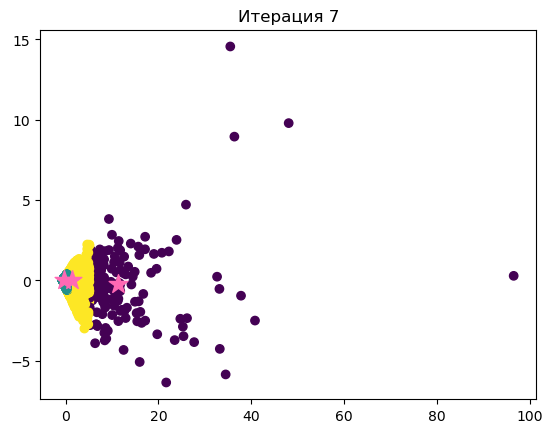

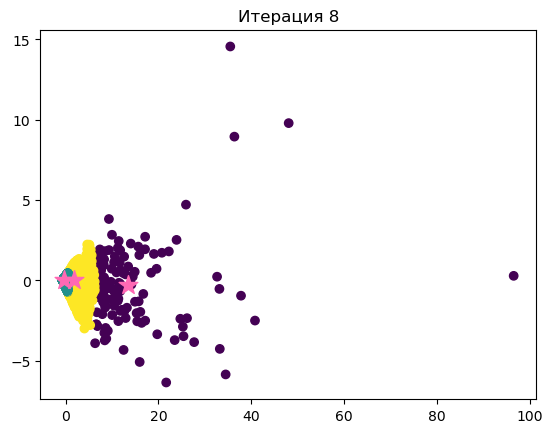

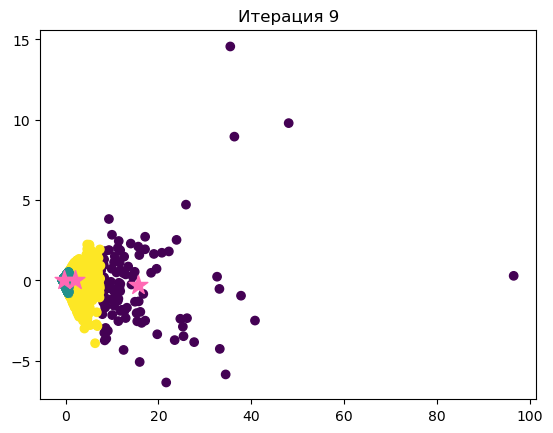

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def random_centroids(data, centroid_count):
    return data.sample(n=centroid_count)

def get_labels(data, centroids):
    return data.apply(lambda x: np.argmin(np.linalg.norm(x - centroids, axis=1)), axis=1)

def new_centroids(data, labels, centroid_count):
    return data.groupby(labels).mean()

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids)
    plt.title(f'Итерация {iteration}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], color='hotpink', marker='*', s=200)
    plt.show()

data = pd.read_csv('vgsales.csv')
data = data.dropna()
data = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]

n_clusters = 3
centroids = random_centroids(data, n_clusters)

for i in range(10):
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, n_clusters)
    plot_clusters(data, labels, centroids, i)